<a href="https://colab.research.google.com/github/askinsj2022/Jacob-Askins-Math-24/blob/main/Jacob_Askins_Math_24_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#these two lines are about setting up tools for numerical and graphical tasks in Python.

# Normal Random Number Generator

In [ ]:
#CDF PDF

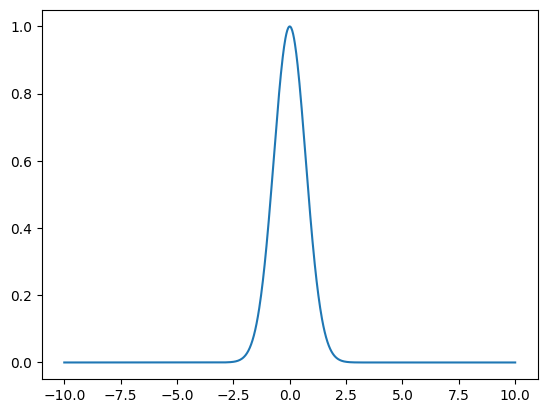

In [ ]:
x = np.linspace(-10,10,1000)
y = 2.71**(-x**2)
plt.plot(x,y)

#These lines create a graph of a specific function. First, x = np.linspace(-10,10,1000) creates an array of 1000 points evenly spaced between -10 and 10. This is your range of x-values. Then y = 2.71**(-x**2) for the y value

$e^{-x^2}$

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/4abaca87a10ecfa77b5a205056523706fe6c9c3f)

In [ ]:
def normal_pdf(x,mu,sigma):

  return (1/(np.sqrt(2*np.pi*sigma**2)))*np.exp((-(x-mu)**2)/(2*sigma**2))

In [ ]:
x = np.linspace(-6,6,1000)

#This function, named normal_pdf, calculates the value of the probability density function (PDF) for a normal (or Gaussian) distribution at a given point x.

In [ ]:
mu = 0

#assigns a value to the vairiable mu

In [ ]:
sigma = 1

#assigns a value to the vairiable sigma

In [ ]:
pdf = normal_pdf(x,mu,sigma)

#This line of code calculates the probability density function (PDF) of a normal distribution for an array of values x, with a mean of mu and a standard deviation of sigma, and stores the result in the variable pdf. The function normal_pdf presumably computes the PDF values for the given x, mu, and sigma.

ValueError: x and y must have same first dimension, but have shapes (1000,) and (51,)

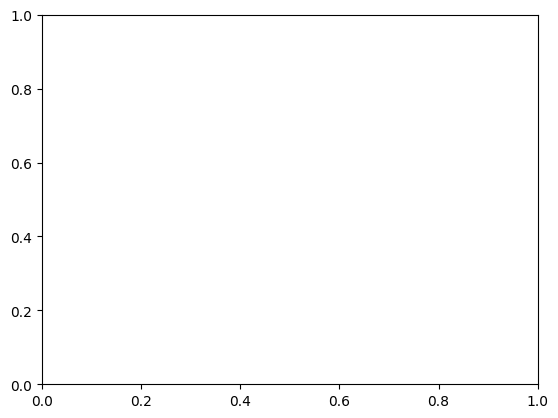

In [ ]:
plt.plot(x,pdf,'.')
#This creates a scatter plot where x is the in the x-axis, pdf in the y-axis, and these are plotted by '.'

In [ ]:
def cumulative_sum(x):

  y = np.zeros(x.shape)

  for n in range(x.shape[0]):

    y[n] = np.sum(x[0:n])

  y = y / np.max(y)

  return y
  #This function calculates and normalizes the cumulative sum of an array x.

In [ ]:
cdf = cumulative_sum(pdf)
#Calculates the cumulative distribution function (CDF) from the PDF pdf using cumulative_sum.

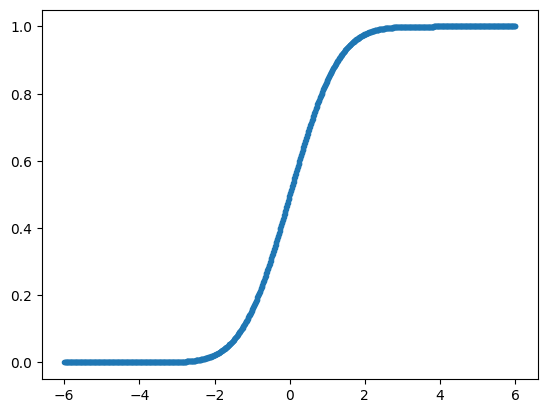

In [ ]:
plt.plot(x,cdf,'.');
#Creates a scatter plot of the cumulative distribution function (CDF) using dots.

In [ ]:
# d_cdf = cdf[1:] - cdf[0:-1] #Demo to show that the derivative of the cdf gives you back the pdf
# plt.plot(x[1:],d_cdf,'.');  #Not required for sampling

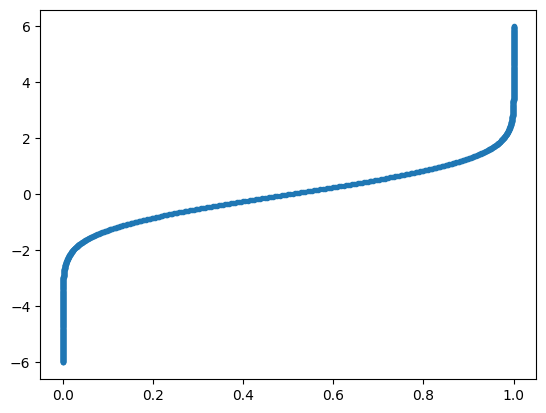

In [ ]:
plt.plot(cdf,x,'.');

#Plots cdf on the y-axis against x on the x-axis using dots for the data points.

In [ ]:
def find_nearest(array, value):

  idx = np.argmin(np.abs(array - value))

  return idx


#Finds the index of the element in array closest to value.

In [ ]:
find_nearest(cdf, 0.1)

#Returns the index of the element in cdf closest to 0.1.

393

In [ ]:
x[393]

#394th element of the array x

-1.2792792792792795

In [ ]:
xr = np.random.random((10000,))

#This line creates an array xr with 10,000 random values uniformly distributed between 0 and 1

In [ ]:
w = np.zeros(xr.shape[0])

for i in range(xr.shape[0]):

  w[i] = x[find_nearest(cdf, xr[i])]

#This code initializes an array w with the same length as xr, then fills w by finding the value in x that corresponds to the closest CDF value for each random value in xr.

In [ ]:
w.shape

#The shape of w is the same as xr, which is (10000,)

(10000,)

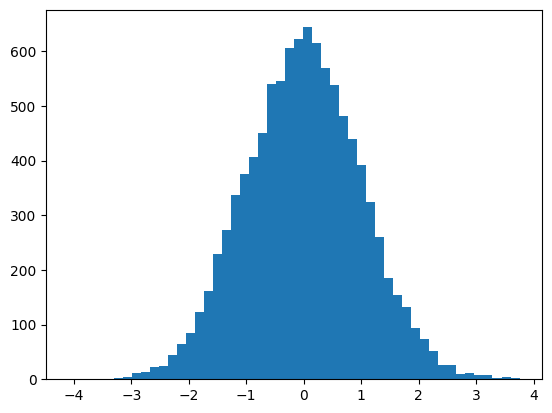

In [ ]:
plt.hist(w,50);

#This line creates a histogram of the array `w` with 50 bins, visualizing its distribution.

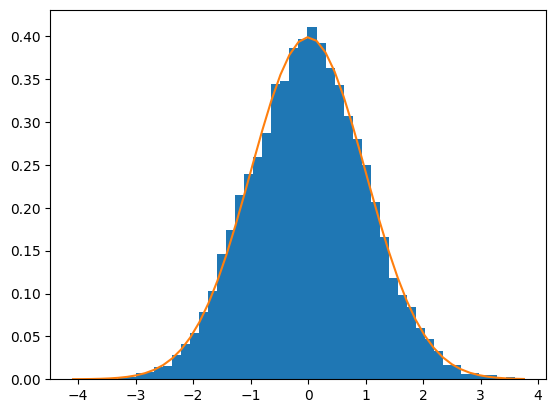

In [ ]:
num_bins = 50
n,bins,patches = plt.hist(w, num_bins, density=1)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
plt.plot(bins,y)

#This code block creates a normalized histogram of `w` with 50 bins and overlays a plot of the probability density function (PDF) for a normal distribution with mean `mu` and standard deviation `sigma`, using the bin edges for x-values.

# Homework

# Birthday Paradox

In [ ]:
import random

def simulate_birthday_paradox(people, simulations):
    matches = 0

    for i in range(simulations):
        birthdays = [random.randint(1, 365) for _ in range(people)]
        if len(birthdays) != len(set(birthdays)):
            matches += 1

    probability = matches / simulations
    return probability

# Number of people in the room
people = 40

# Number of simulations
simulations = 10000

# Calculate the probability
probability = simulate_birthday_paradox(people, simulations)
probability

#This function simulates the birthday paradox, calculating the probability that at least two people in a room of 40 people share the same birthday, over 10,000 simulations. It returns the probability of finding such a match

0.8973

# Monty Hall

In [ ]:
def simulate_monty_hall_final(simulations):
    wins_switching = 0
    wins_staying = 0

    for _ in range(simulations):
        # Randomly assign the car to a door (1, 2, or 3)
        car_door = random.randint(1, 3)
        # Player makes an initial choice
        player_choice = random.randint(1, 3)

        # Host opens a door, which is neither the player's choice nor the car door
        for host_choice in [1, 2, 3]:
            if host_choice != car_door and host_choice != player_choice:
                break

        # Find the remaining door for the player to switch to
        for switch_choice in [1, 2, 3]:
            if switch_choice != player_choice and switch_choice != host_choice:
                break

        # Count the number of wins for staying with the initial choice
        if player_choice == car_door:
            wins_staying += 1

        # Count the number of wins for switching to the other door
        if switch_choice == car_door:
            wins_switching += 1

    # Calculate the probabilities of winning by staying and switching
    probability_staying = wins_staying / simulations
    probability_switching = wins_switching / simulations

    return probability_staying, probability_switching

# Running the final version of the simulation
final_probability_staying, final_probability_switching = simulate_monty_hall_final(simulations)
final_probability_staying, final_probability_switching

#This function simulates the Monty Hall problem, comparing the strategies of staying with the initial choice versus switching doors, over a given number of simulations. It returns the probabilities of winning for both staying and switching strategies.

(0.3335, 0.6665)

# Simple Craps

In [ ]:
def simulate_dice_game(simulations):
    wins = 0

    for _ in range(simulations):
        # Roll two six-sided dice
        roll = random.randint(1, 6) + random.randint(1, 6)

        # Check for immediate win or loss
        if roll in [7, 11]:
            wins += 1
            continue
        elif roll in [2, 3, 12]:
            continue

        # Save the initial roll
        initial_roll = roll

        # Re-roll phase
        while True:
            roll = random.randint(1, 6) + random.randint(1, 6)
            if roll == 7:  # Loss condition
                break
            elif roll == initial_roll:  # Win condition
                wins += 1
                break

    probability_of_winning = wins / simulations
    return probability_of_winning

# Number of simulations
simulations = 10000

# Calculate the probability
probability_of_winning = simulate_dice_game(simulations)
probability_of_winning

#This function simulates a dice game where a player wins immediately if they roll a 7 or 11, loses immediately if they roll a 2, 3, or 12, and otherwise tries to roll their initial number again before rolling a 7. It returns the probability of winning based on the given number of simulations.

0.4954

# Collector's Card Paradox


In [ ]:
def simulate_card_collectors_problem(n, simulations):
    total_card_packs_bought = 0

    for _ in range(simulations):
        collected_characters = set()
        card_packs_bought = 0

        # Buy card packs until all characters are collected
        while len(collected_characters) < n:
            new_card = random.randint(1, n)
            collected_characters.add(new_card)
            card_packs_bought += 1

        total_card_packs_bought += card_packs_bought

    # Calculate the average number of card packs needed
    average_card_packs_needed = total_card_packs_bought / simulations
    return average_card_packs_needed

# Number of different characters
n = 10

# Calculate the expected number of card packs
expected_card_packs = simulate_card_collectors_problem(n, simulations)
expected_card_packs

#This function simulates the card collector's problem, where a collector buys packs of cards to collect `n` different characters. It calculates the average number of packs a collector needs to buy to collect all characters, based on the given number of simulations.

29.3649

In [ ]:
import random

def simulate_sock_drawer_problem(n, simulations):
    total_draws = 0

    for _ in range(simulations):
        socks = {}
        draws = 0

        while True:
            # Randomly draw a sock
            sock_color = random.randint(1, n)
            draws += 1

            # Update the count for this color
            if sock_color in socks:
                socks[sock_color] += 1
            else:
                socks[sock_color] = 1

            # Check for a pair
            if socks[sock_color] == 2:
                break

        total_draws += draws

    # Calculate the average number of draws needed
    average_draws_needed = total_draws / simulations
    return average_draws_needed

# Number of pairs of socks
n = 10

# Number of simulations
simulations = 10000

# Calculate the expected number of draws
expected_draws = simulate_sock_drawer_problem(n, simulations)
expected_draws

#This function simulates the sock drawer problem, where a person has `n` pairs of differently colored socks in a drawer and randomly draws socks until a matching pair is found. It calculates the average number of draws needed to find a pair over a specified number of simulations.

4.6439